In [1]:
## Importar librerias

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statistics as stat

import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_rows', None)

## Carga del Dataset


In [9]:
df_1 = pd.read_csv('Productos del 2020_12_31 al 2021_04_30.csv',encoding='latin-1')
df_2 = pd.read_csv('Productos del 2021_05_01 al 2021_05_31.csv',encoding='latin-1')
rt = pd.read_excel('Ratings.xlsx')
df_SKU = pd.read_excel('Productos_en_stock_order_by_New_SKU V2.xlsx')

In [10]:
df_1 = df_1.drop('timeOnPage', axis=1)
print(df_1.shape)
df_2 = df_2.drop('timeOnPage', axis=1)
print(df_2.shape)

(907801, 6)
(396135, 6)


In [11]:
frames = [df_1, df_2]
df = pd.concat(frames)
df = df.drop('Unnamed: 0', axis = 1)
df.shape

(1303936, 5)

In [12]:
df["clientId"] = df["clientId"].astype(float).astype(str)
df.head()

,clientId,dateHourMinute,productSku,productName,shoppingStage
0,1000024114.1616719,202103251703,34901,SWEATER MILAN CRUDO,ALL_VISITS
1,1000024114.1616719,202103251703,34901,SWEATER MILAN CRUDO,NO_CART_ADDITION
2,1000024114.1616719,202103251703,34901,SWEATER MILAN CRUDO,PRODUCT_VIEW
3,1000190327.1612227,202102011654,29259,TOP ZARA AMARILLO,ALL_VISITS
4,1000190327.1612227,202102011654,29259,TOP ZARA AMARILLO,NO_CART_ADDITION


In [13]:
df['shoppingStage'].value_counts()

ALL_VISITS                        277927
PRODUCT_VIEW                      273737
NO_CART_ADDITION                  179766
ADD_TO_CART                        88688
ADD_TO_CART_WITH_VIEW              88688
CHECKOUT                           56258
CHECKOUT_1                         56161
CHECKOUT_ABANDONMENT               50627
CHECKOUT_WITH_CART_ADDITION        49495
CART_ABANDONMENT                   39165
CHECKOUT_2                         37450
CHECKOUT_3                         31040
CHECKOUT_3_ABANDONMENT             25500
CHECKOUT_1_ABANDONMENT             16603
CHECKOUT_2_ABANDONMENT              8526
TRANSACTION                         8389
CHECKOUT_WITHOUT_CART_ADDITION      6771
NO_PRODUCT_VIEW                     4208
TRANSACTION_WITHOUT_CHECKOUT        2752
CHECKOUT_3_WITHOUT_CHECKOUT_2       2130
CHECKOUT_2_WITHOUT_CHECKOUT_1         45
NO_SHOPPING_ACTIVITY                  10
Name: shoppingStage, dtype: int64

In [14]:
df.head()

,clientId,dateHourMinute,productSku,productName,shoppingStage
0,1000024114.1616719,202103251703,34901,SWEATER MILAN CRUDO,ALL_VISITS
1,1000024114.1616719,202103251703,34901,SWEATER MILAN CRUDO,NO_CART_ADDITION
2,1000024114.1616719,202103251703,34901,SWEATER MILAN CRUDO,PRODUCT_VIEW
3,1000190327.1612227,202102011654,29259,TOP ZARA AMARILLO,ALL_VISITS
4,1000190327.1612227,202102011654,29259,TOP ZARA AMARILLO,NO_CART_ADDITION


In [15]:
rt.head()

,Unnamed: 0,Unnamed: 1,Ranking
0,NO_PRODUCT_VIEW,Productos,0
1,NO_SHOPPING_ACTIVITY,Salio del primer paso sin realizar nada,0
2,ALL_VISITS,Todas las sesiones,1
3,PRODUCT_VIEW,Producto visto,1
4,NO_CART_ADDITION,"al menos 1 acción de detalle, pero ninguna acc...",2


In [16]:
#Nos quedamos con los productos que cargamos nosotros (SKU nuestro, dado que un items con varios colores respresenta un SKU)
df1 = pd.merge(df,df_SKU,how="inner",left_on="productSku",right_on="sku" )
print(df1.shape)
df1.head()

(321894, 8)


,clientId,dateHourMinute,productSku,productName,shoppingStage,description,sku,newSKU
0,1000482011.1616118,202103241548,34967,TAPADO OTAWA CRUDA CORDEROY,ALL_VISITS,CAMPERA OTAWA CRUDA,34967,34957
1,1000482011.1616118,202103241548,34967,TAPADO OTAWA CRUDA CORDEROY,NO_CART_ADDITION,CAMPERA OTAWA CRUDA,34967,34957
2,1000482011.1616118,202103241548,34967,TAPADO OTAWA CRUDA CORDEROY,PRODUCT_VIEW,CAMPERA OTAWA CRUDA,34967,34957
3,1016496079.1617075,202103292035,34967,CAMPERA OTAWA CRUDA,ADD_TO_CART,CAMPERA OTAWA CRUDA,34967,34957
4,1016496079.1617075,202103292035,34967,CAMPERA OTAWA CRUDA,ADD_TO_CART_WITH_VIEW,CAMPERA OTAWA CRUDA,34967,34957


In [17]:
#Cambio el nombre de las columnas en rt
rt.rename(columns={"Unnamed: 0": "shoppingStage"}, inplace=True)
rt = rt.drop(['Unnamed: 1'],axis=1)
rt

,shoppingStage,Ranking
0,NO_PRODUCT_VIEW,0
1,NO_SHOPPING_ACTIVITY,0
2,ALL_VISITS,1
3,PRODUCT_VIEW,1
4,NO_CART_ADDITION,2
5,ADD_TO_CART,3
6,ADD_TO_CART_WITH_VIEW,3
7,CART_ABANDONMENT,3
8,CHECKOUT,4
9,CHECKOUT_1,4


In [18]:
df1 = pd.merge(df1,rt,on='shoppingStage')
print(df1.shape)
df1.head()

(321894, 9)


,clientId,dateHourMinute,productSku,productName,shoppingStage,description,sku,newSKU,Ranking
0,1000482011.1616118,202103241548,34967,TAPADO OTAWA CRUDA CORDEROY,ALL_VISITS,CAMPERA OTAWA CRUDA,34967,34957,1
1,1016496079.1617075,202103292035,34967,CAMPERA OTAWA CRUDA,ALL_VISITS,CAMPERA OTAWA CRUDA,34967,34957,1
2,1025323258.1616719,202103260330,34967,CAMPERA OTAWA CRUDA,ALL_VISITS,CAMPERA OTAWA CRUDA,34967,34957,1
3,103117182.1617078,202103292120,34967,CAMPERA OTAWA CRUDA,ALL_VISITS,CAMPERA OTAWA CRUDA,34967,34957,1
4,1043368761.1617069,202103291858,34967,CAMPERA OTAWA CRUDA,ALL_VISITS,CAMPERA OTAWA CRUDA,34967,34957,1


In [19]:
df1['shoppingStage'].value_counts()

ALL_VISITS                        69116
PRODUCT_VIEW                      63141
NO_CART_ADDITION                  41566
ADD_TO_CART                       19951
ADD_TO_CART_WITH_VIEW             19951
CHECKOUT                          13659
CHECKOUT_1                        13609
CHECKOUT_WITH_CART_ADDITION       11844
CHECKOUT_ABANDONMENT              11144
CHECKOUT_2                         8790
TRANSACTION                        8328
CART_ABANDONMENT                   8083
CHECKOUT_3                         7250
NO_PRODUCT_VIEW                    5980
TRANSACTION_WITHOUT_CHECKOUT       5812
CHECKOUT_3_ABANDONMENT             4830
CHECKOUT_1_ABANDONMENT             4089
CHECKOUT_2_ABANDONMENT             2225
CHECKOUT_WITHOUT_CART_ADDITION     1816
CHECKOUT_3_WITHOUT_CHECKOUT_2       688
CHECKOUT_2_WITHOUT_CHECKOUT_1        21
NO_SHOPPING_ACTIVITY                  1
Name: shoppingStage, dtype: int64

# Market Basket

## Solo transaccion

In [20]:
df2 = df1.drop(columns=["dateHourMinute","productSku","description","sku"])
df2 = df2[df2.newSKU !="No va"]
df2 = df2[df2.newSKU !="(not set)"]
df2.shape

(276814, 5)

In [21]:
#Nos quedamos solo con las transacciones
df3 = df2[df2.shoppingStage =="TRANSACTION"]
#Nos quedamos con las dos columnas
df3 = df3.loc[:,['clientId','newSKU']]
print(df3.shape)
df3

(1004, 2)


,clientId,newSKU
303003,1620462277.1615143,34957
303004,1087565999.1621785,34957
303005,1087565999.1621785,34957
303006,1416271748.1621447,34957
303007,1416271748.1621447,34957
303008,1416271748.1621447,34957
303009,1416271748.1621447,34957
303010,1416271748.1621447,34957
303011,1508677264.162052,34957
303012,1508677264.162052,34957


In [22]:
#Cantidad de productos en las transacciones
Agrupado = df3.groupby(['newSKU']).count()
Agrupado.sort_values(ascending=False, by="clientId")


,clientId
newSKU,
34023,202
35627,78
35993,77
35836,67
33891,58
35276,56
34957,42
31423,40
35491,38


In [24]:
df3["newSKU"] = df3["newSKU"].astype(object).astype(int)
df3.dtypes

clientId    object
newSKU       int64
dtype: object

In [25]:
onehot = df3.pivot_table(index='clientId', columns='newSKU', aggfunc=len, fill_value=0)
onehot = onehot>0
onehot


newSKU,31423,33891,34023,34554,34740,34928,34957,35237,35276,35481,...,35744,35836,35951,35993,36793,37155,37210,37377,37467,37575
clientId,,,,,,,,,,,,,,,,,,,,,
1002702169.1620742,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
10045442.159441352,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1009949979.1569027,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1016593395.1615955,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1019347458.1621825,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
102029298.16170414,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1020634164.1622028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1023593508.1622138,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1037425175.1621779,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
#!pip install mlxtend
from mlxtend.frequent_patterns import association_rules, apriori

# Calcula la frequencia por item usando el apriori
frequent_itemsets = apriori(onehot, min_support = 0.01, use_colnames=True)

# Calcula todas las reglas de asociacion para frequent_itemsets
rules = association_rules(frequent_itemsets, metric= 'lift', min_threshold=1) #investigar metric y min_threshold

print(rules.shape)
rules

(16, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(35993),(34957),0.123418,0.041139,0.012658,0.102564,2.493097,0.007581,1.068445
1,(34957),(35993),0.041139,0.123418,0.012658,0.307692,2.493097,0.007581,1.266174
2,(35993),(35237),0.123418,0.037975,0.012658,0.102564,2.700855,0.007971,1.071971
3,(35237),(35993),0.037975,0.123418,0.012658,0.333333,2.700855,0.007971,1.314873
4,(35993),(35276),0.123418,0.079114,0.018987,0.153846,1.944615,0.009223,1.088320
5,(35276),(35993),0.079114,0.123418,0.018987,0.240000,1.944615,0.009223,1.153398
6,(35993),(35617),0.123418,0.041139,0.012658,0.102564,2.493097,0.007581,1.068445
7,(35617),(35993),0.041139,0.123418,0.012658,0.307692,2.493097,0.007581,1.266174
8,(35744),(35743),0.028481,0.034810,0.012658,0.444444,12.767677,0.011667,1.737342
9,(35743),(35744),0.034810,0.028481,0.012658,0.363636,12.767677,0.011667,1.526673


In [27]:
#Se armo una variable que cuenta cuantos productos tengo como antecedentes a los productos de la consecuencia.
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )

rules = rules.sort_values('lift', ascending=False)
print(rules.shape)
rules

(16, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
10,(35743),(37575),0.034810,0.037975,0.028481,0.818182,21.545455,0.027159,5.291139,1
11,(37575),(35743),0.037975,0.034810,0.028481,0.750000,21.545455,0.027159,3.860759,1
8,(35744),(35743),0.028481,0.034810,0.012658,0.444444,12.767677,0.011667,1.737342,1
9,(35743),(35744),0.034810,0.028481,0.012658,0.363636,12.767677,0.011667,1.526673,1
12,(35744),(37575),0.028481,0.037975,0.012658,0.444444,11.703704,0.011577,1.731646,1
13,(37575),(35744),0.037975,0.028481,0.012658,0.333333,11.703704,0.011577,1.457278,1
2,(35993),(35237),0.123418,0.037975,0.012658,0.102564,2.700855,0.007971,1.071971,1
3,(35237),(35993),0.037975,0.123418,0.012658,0.333333,2.700855,0.007971,1.314873,1
0,(35993),(34957),0.123418,0.041139,0.012658,0.102564,2.493097,0.007581,1.068445,1
6,(35993),(35617),0.123418,0.041139,0.012658,0.102564,2.493097,0.007581,1.068445,1


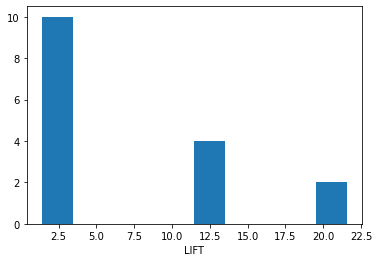

In [28]:
lift_rules = rules.lift

plt.hist(lift_rules)
plt.style.use('ggplot')
plt.xlabel('LIFT')
plt.show()

## Transaccion y checkout

In [41]:
options = [4,5] #ratings mayores significa que son relevantes
  
df3 = df2[df2['Ranking'].isin(options)] 
df3["shoppingStage"].value_counts()

CHECKOUT                          11755
CHECKOUT_1                        11721
CHECKOUT_ABANDONMENT              10975
CHECKOUT_WITH_CART_ADDITION       10440
CHECKOUT_2                         7331
CHECKOUT_3                         5551
CHECKOUT_3_ABANDONMENT             4774
CHECKOUT_1_ABANDONMENT             4007
CHECKOUT_2_ABANDONMENT             2194
CHECKOUT_WITHOUT_CART_ADDITION     1316
TRANSACTION                        1004
CHECKOUT_3_WITHOUT_CHECKOUT_2       417
TRANSACTION_WITHOUT_CHECKOUT        223
CHECKOUT_2_WITHOUT_CHECKOUT_1        17
Name: shoppingStage, dtype: int64

In [30]:
df3.head()

,clientId,productName,shoppingStage,newSKU,Ranking
213725,1016496079.1617075,CAMPERA OTAWA CRUDA,CHECKOUT,34957,4
213726,1241748701.1616895,CAMPERA OTAWA CRUDA,CHECKOUT,34957,4
213727,1307021315.1616883,CAMPERA OTAWA CRUDA,CHECKOUT,34957,4
213728,1342283876.1589258,CAMPERA OTAWA CRUDA,CHECKOUT,34957,4
213729,1373018362.1616726,CAMPERA OTAWA CRUDA,CHECKOUT,34957,4


In [42]:
#Nos quedamos con las dos columnas que nos interesan
df4 = df3.loc[:,['clientId','newSKU']]
print(df4.shape)
df4.head()


(71725, 2)


,clientId,newSKU
213725,1016496079.1617075,34957
213726,1241748701.1616895,34957
213727,1307021315.1616883,34957
213728,1342283876.1589258,34957
213729,1373018362.1616726,34957


In [43]:
#Quitamos los duplicados

df_TandC = df4.drop_duplicates()
print(df_TandC.shape)

(4241, 2)


In [44]:
df_TandC["newSKU"] = df_TandC["newSKU"].astype(object).astype(int)
df_TandC.dtypes

<ipython-input-44-f3ef1a19617a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TandC["newSKU"] = df_TandC["newSKU"].astype(object).astype(int)


clientId    object
newSKU       int64
dtype: object

In [45]:
onehot = df_TandC.pivot_table(index='clientId', columns='newSKU', aggfunc=len, fill_value=0)
onehot = onehot>0
onehot.shape

(2438, 25)

In [46]:
onehot.head()

newSKU,31423,33891,34023,34554,34740,34928,34957,35237,35276,35481,...,35744,35836,35951,35993,36793,37155,37210,37377,37467,37575
clientId,,,,,,,,,,,,,,,,,,,,,
1000637613.1619183,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1002702169.1620742,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1003990228.1593977,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1004075952.1616552,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10045442.159441352,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
onehot.dtypes

newSKU
31423    bool
33891    bool
34023    bool
34554    bool
34740    bool
34928    bool
34957    bool
35237    bool
35276    bool
35481    bool
35491    bool
35584    bool
35617    bool
35627    bool
35743    bool
35744    bool
35836    bool
35951    bool
35993    bool
36793    bool
37155    bool
37210    bool
37377    bool
37467    bool
37575    bool
dtype: object

In [37]:
# Calcula la frequencia por item usando el apriori
frequent_itemsets = apriori(onehot, min_support = 0.01, use_colnames=True)

# Calcula todas las reglas de asociacion para frequent_itemsets
rules = association_rules(frequent_itemsets, metric= 'lift', min_threshold=1.2) #investigar metric y min_threshold

print(rules.shape)
rules

(38, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(34554),(34740),0.075472,0.089418,0.011895,0.157609,1.762615,0.005147,1.080949
1,(34740),(34554),0.089418,0.075472,0.011895,0.133028,1.762615,0.005147,1.066387
2,(35617),(34554),0.146842,0.075472,0.013946,0.094972,1.258380,0.002863,1.021547
3,(34554),(35617),0.075472,0.146842,0.013946,0.184783,1.258380,0.002863,1.046541
4,(34928),(34740),0.093109,0.089418,0.011075,0.118943,1.330194,0.002749,1.033511
5,(34740),(34928),0.089418,0.093109,0.011075,0.123853,1.330194,0.002749,1.035090
6,(35584),(34740),0.063167,0.089418,0.014356,0.227273,2.541701,0.008708,1.178401
7,(34740),(35584),0.089418,0.063167,0.014356,0.160550,2.541701,0.008708,1.116009
8,(35617),(34957),0.146842,0.053733,0.013126,0.089385,1.663525,0.005235,1.039153
9,(34957),(35617),0.053733,0.146842,0.013126,0.244275,1.663525,0.005235,1.128927


In [38]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules = rules.sort_values('lift', ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
33,(37575),(35743),0.034044,0.027892,0.022970,0.674699,24.189936,0.022020,2.988333,1
32,(35743),(37575),0.027892,0.034044,0.022970,0.823529,24.189936,0.022020,5.473749,1
37,(37155),(36793),0.054143,0.038146,0.013126,0.242424,6.355165,0.011060,1.269647,1
36,(36793),(37155),0.038146,0.054143,0.013126,0.344086,6.355165,0.011060,1.442045,1
12,(35993),(35237),0.083265,0.045119,0.019688,0.236453,5.240663,0.015931,1.250586,1
13,(35237),(35993),0.045119,0.083265,0.019688,0.436364,5.240663,0.015931,1.626465,1
17,(35276),(35993),0.071780,0.083265,0.030353,0.422857,5.078452,0.024376,1.588402,1
16,(35993),(35276),0.083265,0.071780,0.030353,0.364532,5.078452,0.024376,1.460687,1
11,(35237),(35276),0.045119,0.071780,0.011075,0.245455,3.419532,0.007836,1.230171,1
10,(35276),(35237),0.071780,0.045119,0.011075,0.154286,3.419532,0.007836,1.129082,1


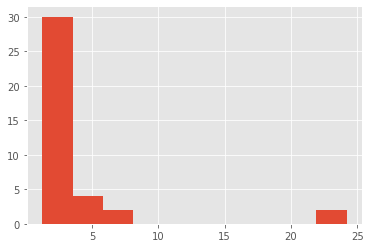

In [39]:
#Histograma de los lift resultantes
lift_rules = rules.lift

plt.hist(lift_rules)
plt.style.use('ggplot')
plt.show()

(array([1.571e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        4.490e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.790e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.140e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 5.800e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.200e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

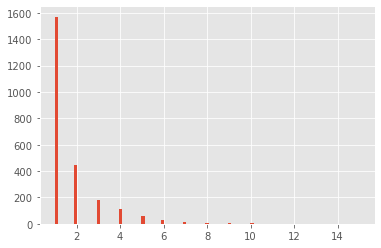

In [40]:
plt.hist(onehot.sum(axis=1),bins='auto', )
